In [3]:
# HOME
import os
import scipy
# get the code
import sys
sys.path.append('../code')
from plot import plot_genomic
from rollingCNV import one_col_rolling

home = '/Users/mahtin'
# home = '/Users/martinscience'
# standard paths
testdata = os.path.join(home,"Dropbox/Icke/Work/somVar/testdata")
static_path = os.path.join(home, "Dropbox/Icke/Work/static")
cluster_path = os.path.join(home, "mount")
tooldata = os.path.join(home, "Dropbox/Icke/Work/somVar/tooldata")

# tool-specific paths
shell_path = "../shell"
# 
cnvdata = os.path.join(tooldata, "myCNVdata")
output_path = os.path.join(cnvdata, "output")

# the path to the input data
cnv_path = os.path.join(cnvdata, "cnv")
cnvPON_path = cnv_path = os.path.join(cnvdata, "chromCov")
cnv_path = os.path.join(cluster_path, "scratch/develop/PONcoverage/cnv")
cnvPON_path = os.path.join(cluster_path, "scratch/develop/PONcoverage/chromCov")

In [4]:
cnvPON_path

'/Users/mahtin/mount/scratch/develop/PONcoverage/chromCov'

## get the coverage and SNP data

In [5]:
sample = "01_A"
snpcov_df = pd.read_csv(os.path.join(output_path, f'rollingCNV/{sample}.snpcov.csv'), sep='\t')
rolling_cov_df = pd.read_csv(os.path.join(output_path, f'rollingCNV/{sample}.rollcov.csv'), sep='\t')

In [6]:
snpcov_df[:10]

,Chr,Pos,FullExonPos,ExonPos,log2ratiomean,log2ratiomeanDiff,Depth,EBscore,VAF
0,chr1,14930,836,836,NaN,NaN,64.0,0.505,0.046875
1,chr1,15820,991,991,0.161229,0.0,13.0,2.401,0.846154
2,chr1,16949,1410,1410,0.161229,0.0,182.0,0.006,0.038462
3,chr1,17365,1689,1689,0.161229,0.0,285.0,0.666,0.140351
4,chr1,17375,1699,1699,0.161229,0.0,353.0,1.526,0.065156
5,chr1,17379,1703,1703,0.161229,0.0,363.0,1.578,0.093664
6,chr1,17384,1708,1708,0.161229,0.0,388.0,0.494,0.002577
7,chr1,17452,1776,1776,0.161229,0.0,529.0,0.178,0.001890
8,chr1,17614,1938,1938,0.161229,0.0,216.0,1.016,0.171296
9,chr1,69270,2994,2994,0.161229,0.0,34.0,0.001,1.000000


In [10]:
snpcov_df.query('log2ratiomean != log2ratiomean')

,Chr,Pos,FullExonPos,ExonPos,log2ratiomean,log2ratiomeanDiff,Depth,EBscore,VAF
0,chr1,14930,836,836,NaN,NaN,64.0,0.505,0.046875
100647,chr6,28392877,15888508,326367,NaN,NaN,317.0,0.313,0.003155
100648,chr6,28392949,15888559,326439,NaN,NaN,511.0,0.830,0.001957
100649,chr6,28398006,15888702,326582,NaN,NaN,241.0,0.567,0.004149
100650,chr6,28398203,15888835,326715,NaN,NaN,419.0,0.516,0.002387
100651,chr6,28434509,15889069,326949,NaN,NaN,248.0,0.519,0.004032
100652,chr6,28434601,15889161,327041,NaN,NaN,315.0,0.853,0.003175
100653,chr6,28434604,15889164,327044,NaN,NaN,314.0,0.394,0.003185
100654,chr6,28434724,15889284,327164,NaN,NaN,286.0,0.545,0.003497
100655,chr6,28435448,15889646,327525,NaN,NaN,221.0,0.922,0.429864


In [11]:
rolling_cov_df[:10]

,Chr,Pos,FullExonPos,ExonPos,log2ratiomean,log2ratiomeanDiff
0,chr1,12600,170,170,NaN,NaN
1,chr1,12650,220,220,NaN,NaN
2,chr1,12700,270,270,NaN,NaN
3,chr1,12750,320,320,NaN,NaN
4,chr1,13450,365,365,NaN,NaN
5,chr1,13500,415,415,NaN,NaN
6,chr1,13550,465,465,NaN,NaN
7,chr1,13600,515,515,NaN,NaN
8,chr1,13650,565,565,NaN,NaN
9,chr1,14700,606,606,NaN,NaN


### visualize the data

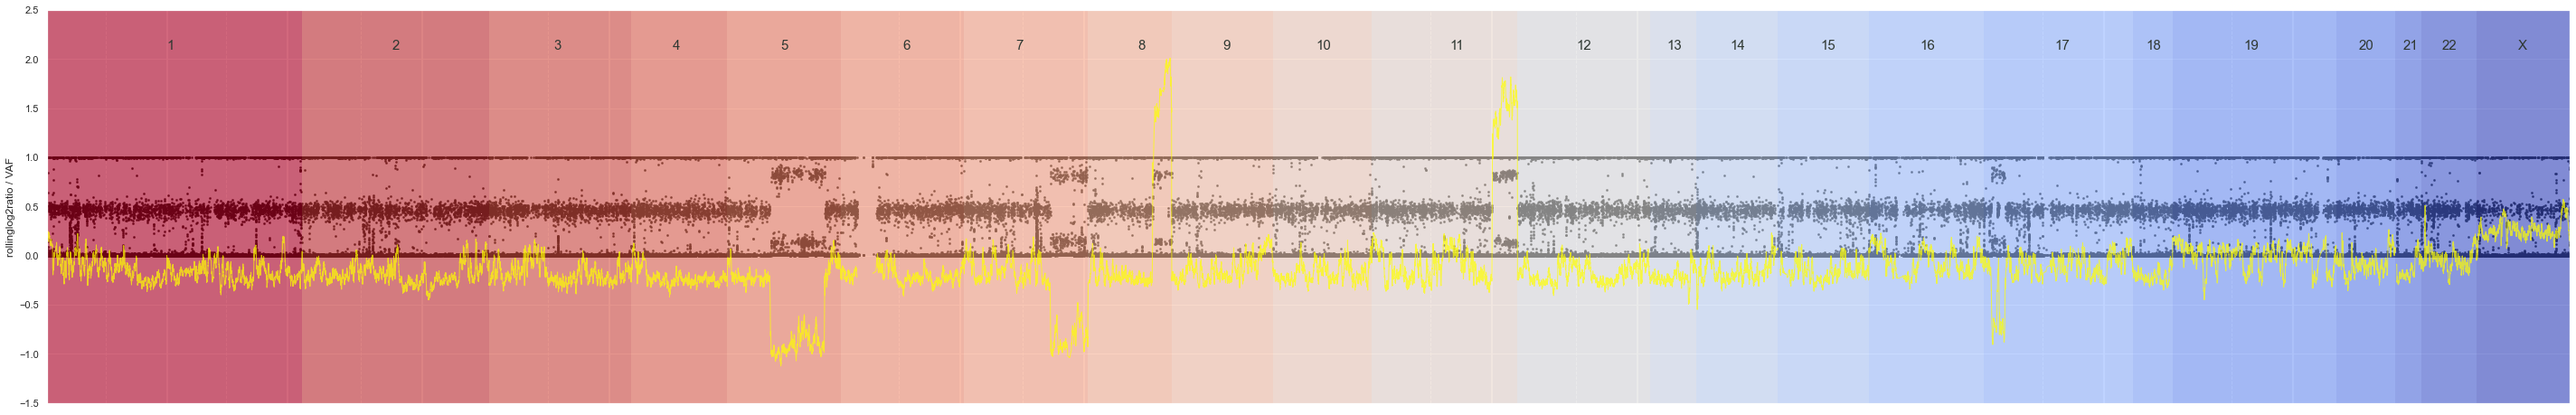

In [12]:
fig_params = dict(
    figsize=(50,8),
    colormap='coolwarm_r',
    color_chroms=True,
    ylim=(-1.5,2.5)
)

log2mean = dict(
        title='rollinglog2ratio',
        plot_type='line',   # ['line', 'scatter']
        data='log2ratiomean',
        plot_args=dict(
            linewidth=1,
            color='yellow',
            alpha=.7
        )
    )


log2diff = dict(
        title='rollinglog2ratio',
        plot_type='line',   # ['line', 'scatter']
        data='log2ratiomeanDiff',
        plot_args=dict(
            linewidth=1,
            color='blue',
            alpha=.7
        ))

vaf = dict(
        title='VAF',
        plot_type='scatter',   # ['line', 'scatter']
        data='VAF',
        plot_args=dict(
            linewidth=0.3,
            color='black',
            s=5,
            alpha=1
        ))


plots = [
    log2mean,
    vaf
]

chroms = ['chr5', 'chr7','chr8', 'chr11', 'chr17']
r1 = 'chr17:3Mb-9Mb'

fig, ax, df, chrom_df = plot_genomic(snpcov_df, plots=plots, chroms='all', region='', **fig_params)

## heteroSNP rolling window
+ #### first, the center cluster has to be fitted via clustering to identify the centers for mean correction
+ #### look at the distribution of VAF and rolling log2ratio
+ #### chrX seems to have different log2ratio (maybe adjusted for XX and XY)

In [ ]:
plt.scatter(snpcov_df['log2ratiomean'], snpcov_df['VAF'], s=.1);

In [ ]:
merge = snpcov_df.query('Chr != "chrX"').query('0.05 < VAF < 0.95 and log2ratiomean == log2ratiomean')
plt.scatter(merge['log2ratiomean'], merge['VAF'], s=.1);

+ #### try DBSCAN

### DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

# get the matrix
X = merge[['log2ratiomean', 'VAF']]
rows = X.shape[0]
labels = DBSCAN(eps=.2, min_samples=int(rows/3.5)).fit_predict(X)
plt.scatter(X['log2ratiomean'], X['VAF'], c=labels, s=1, cmap='viridis')
cluster, counts = np.unique(labels, return_counts=True)
len(cluster[cluster != -1])

+ #### DBSCAN seems to be best fitted for removing the center mass as the spread is hard to guess
    * perform a grid search on eps and min_samples to find the maximum center mass with just one cluster
    * better!: perform this grid search on multi-dimensional data

In [ ]:
sample_count = X.shape[0]
max_counts = 0
for i in np.linspace(1,6,10):
    for ep in np.logspace(-1.5,0,10):
        ms = int(sample_count / i)
        model = DBSCAN(eps=0.2, min_samples=ms)
        labels = model.fit_predict(X)
        cluster, counts = np.unique(labels, return_counts=True)
        # get the number of clusters 
        cluster_count = len(cluster[cluster != -1])
        # get the size of cluster 0
        cluster_size = counts[cluster == 0]
        if cluster_count:
            if cluster_size > max_counts:
                best_model = model
        print(f"ep:{ep}|min_samples:{ms}>> {cluster_count} clusters | cluster0: {cluster_size}")

In [ ]:
labels = best_model.fit_predict(X)
plt.scatter(X['log2ratiomean'], X['VAF'], c=labels, s=1, cmap='viridis')

+ #### GMM clustering runs best for fitting the center mass
    * clusters vary depending on init clusters

In [ ]:
from sklearn.mixture import GaussianMixture as GMM

X = merge[['log2ratiomean', 'VAF']]
X
choice = range(5)
fig, axes = plt.subplots(1, len(choice), figsize=(20,5))
for i, components in enumerate(choice):
    gmm = GMM(n_components=2, covariance_type='diag', n_init=2)
    labels = gmm.fit_predict(X)
    _, counts = np.unique(labels, return_counts=True)
    print(np.max(counts))
    axes[i].scatter(X['log2ratiomean'], X['VAF'], c=labels, s=1)
    # print(f'{components} components - AIC:', gmm.aic(X))
    # print(f'{components} components - BIC:', gmm.bic(X))

+ increasing n_init to 20 does the job:

In [ ]:
choice = range(5)
fig, axes = plt.subplots(1, len(choice), figsize=(20,5))
for i, components in enumerate(choice):
    gmm = GMM(n_components=2, covariance_type='diag', n_init=20)
    labels = gmm.fit_predict(X)
    _, counts = np.unique(labels, return_counts=True)
    print(np.max(counts))
    axes[i].scatter(X['log2ratiomean'], X['VAF'], c=labels, s=1)
    # print(f'{components} components - AIC:', gmm.aic(X))
    # print(f'{components} components - BIC:', gmm.bic(X))

+ get_centers computes the means from the best fit centers

In [ ]:
from sklearn.mixture import GaussianMixture as GMM

def get_centers(merge_df, runs=25, VAF_limits=(0.05, 0.95), exclude_X=True):
    '''
    use GMM to identify the center cluster and get the means from that
    because GMM occasionally does not identify the center cluster,
    I let the GMM proceed several times and minimize the center cluster
    next, the center cluster can be identified as the maximum center
    '''
    VAFmin, VAFmax = VAF_limits
    # fit the centers to the data 
    if exclude_X:
        merge_df = merge_df.query('Chr != "chrX"')     
    X = merge_df.query('@VAFmin < VAF < @VAFmax and log2ratiomean == log2ratiomean')[['log2ratiomean', 'VAF']]

    gmm = GMM(n_components=2, covariance_type='diag', n_init=runs).fit(X)
    labels = gmm.predict(X)
    # get the size of the 
    _, counts = np.unique(labels, return_counts=True)
    maxcount = np.max(counts)
    centers = pd.DataFrame(gmm.means_, columns=['log2ratio', 'VAF'])
    # get mean_cov and meanVAF from largest cluster
    meanCov, meanVAF = centers.loc[np.argmax(counts)]
    size = maxcount
            
    print(f'GMM using {runs} inits: center size {size} meanVAF = {round(meanVAF, 2)} meanCov={round(meanCov, 2)}')
    
    return meanCov, meanVAF, centers

In [ ]:
meanCov, meanVAF, centers = get_centers(snpcov_df)
meanVAF

In [ ]:
config = {
    'debug': False, # also export the left and right rolling window values (L/R)
    'coverage': {
        'filter': dict(
            min_cov = 30,
            min_PON_cov = 50,
            max_PON_std = 100,
        ),
        'normalize':False,
        'center': True,
        'expand':0.2, # after interpolation of rolling data from filtered df into full df, interpolate missing data within this fraction of window size, set 0 if no interpolation is wanted
        'data': {
            'log2ratio': {
                'mean':100
            }
        }
    },
    'heteroSNP': {
        'filter': dict(
            VAF=(0.05,0.95),
            minDepth=30,
            minEB=0.5
        ),
        'normalize': True,
        'center':False,
        'expand': 0.5,
        'data': {
            'absVAF': {
                'sum': 20
            },
            'VAF': {
                'std': 20
            },
            'deltaVAF': {
                'std': 20
            }
        }
    }
}


def center_data(snp_df, config):
    '''
    retrieve the centers for scaling using GMM
    '''
    
    meanCov, meanVAF, _ = get_centers(snp_df, VAF_limits=config['heteroSNP']['filter']['VAF'])
    # center coverage 
    if config['coverage']['center']:
        print("log2ratio centered around", meanCov)
        snp_df.loc[:, 'log2ratiomean'] = snp_df['log2ratiomean'] - meanCov
    if config['heteroSNP']['center']:
        print("heteroSNP centered around", meanVAF)
        snp_df.loc[:, 'VAF'] = snp_df['VAF'] - meanVAF + 0.5
    return snp_df

In [ ]:
snp_df = center_data(snpcov_df, config)
snp_df.query('log2ratiomean != log2ratiomean')

In [ ]:
def expand_SNPdata(snp_df, config):
    '''
    retrieve a few data columns locally to use rolling windows on
    this needs to be done chromosome-wise in order to avoid gap effects
    '''
    
    # get the new features from VAFs
    snp_df.loc[:,'absVAF'] = np.abs(snp_df['VAF'] - 0.5) * 2
    # get the local VAF difference chrom based
    dfs = []
    for chrom in snp_df['Chr'].unique():
        chrom_df = snp_df.query('Chr == @chrom')
        chrom_df.loc[:, 'deltaVAF'] = np.abs(chrom_df['VAF'] - chrom_df.shift(1)['VAF']).fillna(0)
        dfs.append(chrom_df)
    snp_df = pd.concat(dfs).sort_values('FullExonPos')
    return snp_df

In [ ]:
snp2_df = expand_SNPdata(snp_df, config)
snp2_df[:10]

In [ ]:
absvaf = dict(
        title='absVAF',
        plot_type='scatter',   # ['line', 'scatter']
        data='absVAF',
        plot_args=dict(
            linewidth=0.5,
            color='black',
            s=1,
            alpha=1
        ))

chroms = ['chr5', 'chr7','chr8', 'chr11', 'chr17']
r1 = 'chr17:3Mb-9Mb'

fig, ax, df, chrom_df = plot_genomic(snp_df, plots=[log2mean, absvaf], chroms='all', region='', **fig_params)

In [ ]:
def rolling_snp(snp_df, config):
    '''
    cycle through the chroms and perform rolling window computations of snp data set in config
    '''
    
    # split the params dict for easier access
    params = config['heteroSNP']
    filter_params = params['filter']
    data_params = params['data']
    # reduce the snp_df using config limits
    VAFmin, VAFmax = filter_params['VAF'] 
    minDepth = filter_params['minDepth']
    minEBscore = filter_params['minEB']
    
    # cycle through chroms for 
    chrom_dfs = []
    for chrom in snp_df['Chr'].unique():
        # restrict to chrom
        chrom_df = snp_df.query('Chr == @chrom').sort_values('FullExonPos')        
        # filter df
        filter_df = snp_df.query('@VAFmin < VAF < @VAFmax and Depth >= @minDepth and EBscore > @minEBscore')
        for data_col in data_params.keys():
            for agg in data_params[data_col].keys():
                window_size = data_params[data_col][agg]
                expand_limit = int(params['expand'] * window_size)
                # print(f"Computing rolling window for {agg} of {data_col} with window size {window_size} on {chrom}")
                chrom_df = one_col_rolling(chrom_df, filter_df, data_col, agg, window_size=window_size, expand_limit=expand_limit, normalize=params['normalize'], debug=config['debug'])
        chrom_dfs.append(chrom_df)
    df = pd.concat(chrom_dfs).sort_values('FullExonPos')
    
    return df

In [ ]:
snp3_df = rolling_snp(snp2_df, config)
snp3_df

In [ ]:
def get_cols(col, agg='mean', modes=['L', 'R', 'Diff', '']):
    '''
    creates for each col a dict for looped computation
    {'L': 'VAVsumL', 'R': 'VAVsumR', 'Diff': 'VAVsumDiff', '': 'VAFsum'}}
    '''
    cols = {mode: col + agg + mode for mode in modes}
    return cols


def get_rolling_metrix_chrom(df, col='VAF', agg='sum', chrom='', window_size=20):
    '''
    take a column and produce rolling windows from it for each chromosome
    '''
    
    df = df.query('Chr == @chrom')
    cols = get_cols(col, agg)
    
    # get the right computation
    if agg =='std':
        df.loc[:, cols['L']] = df.rolling(window_size)[col].std()
    if agg == 'sum':
        df.loc[:, cols['L']] = df.rolling(window_size)[col].sum()
    if agg == 'mean':
        df.loc[:, cols['L']] = df.rolling(window_size)[col].mean()

    
    # get the right window by shifting the left
    df.loc[:, cols['R']] = df.shift(-window_size + 1)[cols['L']]
    # fillup the margins
    df.loc[:, cols['L']] = df[cols['L']].fillna(method='bfill')
    df.loc[:, cols['R']] = df[cols['R']].fillna(method='ffill')
    return df


def get_rolling_metrix(df, col='VAF', agg='mean', window_size=20, normalize=True):
    '''
    wrapper to apply get_rolling_metrix_chrom per chromosome
    '''
    
    chrom_dfs = []
    for chrom in df['Chr'].unique():
        chrom_df = get_rolling_metrix_chrom(df, col=col, agg=agg, chrom=chrom, window_size=window_size)
        chrom_dfs.append(chrom_df)
    df = pd.concat(chrom_dfs).sort_values('FullExonPos')
    
    cols = get_cols(col, agg)
    if normalize:
    # normalize the data
        print('Normalizing data')
        _min = df[cols['L']].min()
        _max = df[cols['L']].max()
        for side in ['L', 'R']:
            c = cols[side]
            df[c] = (df[c] - _min) / (_max - _min)
    # get the Diff
    df[cols['Diff']] = ((df[cols['L']] - df[cols['R']]) / 2) + 0.5
    df[cols['']] = df[cols['L']] * df[cols['Diff']] + df[cols['R']] * (1 - df[cols['Diff']])
    return df




In [ ]:
rollingSNP_df = rolling_it(snp_df, config['heteroSNP'])
rollingSNP_df

In [ ]:
cov_df = rolling_it(cov_df, config['coverage'])

In [ ]:
def add_rolling_data(snp_df, cov_df, config):
    '''
    add the rolling metrices needed to get local data
    '''
    
    # add extra cols to snp_df
    snp_df = expand_SNPdata(snp_df, config['heteroSNP'])
    
    # get the rolling metrices for snp_df
    snp_df = rolling_it(snp_df, config['heteroSNP'])
    # get the rolling metrices for cov_df
    cov_df = rolling_it(cov_df, config['coverage'])
    
    return snp_df, cov_df

In [ ]:
snp_df, cov_df = add_rolling_data(snp_df, cov_df, config)

In [ ]:
snp_df.to_csv(os.path.join(output_path, 'heteroSNP/01_A.snp'), sep='\t', index=False)
cov_df.to_csv(os.path.join(output_path, 'covDif/01_A.cov'), sep='\t', index=False)

In [ ]:
def centerVAF(snp_df):
    '''
    attempting to correct for off-center VAF means
    '''

    # get the VAF mean
    meanVAF = snp_df.query('0.05 < VAF < 0.95')['VAF'].mean()
    # store the original VAF in orgVAF
    snp_df['orgVAF'] = snp_df['VAF']
    snp_df.loc[snp_df['VAF'] <= meanVAF,
               'VAF'] = snp_df['VAF'] / meanVAF * 0.5
    snp_df.loc[snp_df['VAF'] > meanVAF, 'VAF'] = 0.5 + \
        0.5 * (snp_df['VAF'] - meanVAF) / (1-meanVAF)
    newMeanVAF = snp_df.query('0.05 < VAF < 0.95')['VAF'].mean()
    return snp_df, meanVAF, newMeanVAF